# 1. Introdução

Para esta publicação foi utilizado o conjunto de dados House Sales em King County, EUA da plataforma estatística “[Kaggle](https://www.kaggle.com/)”. Você pode baixá-lo do meu “[Repositório do GitHub](https://github.com/MFuchs1989/Datasets-and-Miscellaneous/tree/main/datasets)”.

# 2. Carregando as bibliotecas e dados

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [4]:
df = pd.read_csv('datasets/house_prices.csv')
df = df.drop(['id', 'date', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long'], axis=1)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,1410,1287


# 3. Pré-Processamento de Dados

In [5]:
x = df.drop('price', axis=1)
y = df['price']

trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.2)

In [6]:
sc = StandardScaler()

scaler = sc.fit(trainX)
trainX_scaled = scaler.transform(trainX)
testX_scaled = scaler.transform(testX)

# 4. MLPRegressor

In [7]:
mlp_reg = MLPRegressor(hidden_layer_sizes=(150,100,50),
                       max_iter = 30, activation = 'relu',
                       solver = 'adam')

mlp_reg.fit(trainX_scaled, trainY)

/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(150, 100, 50), max_iter=30)

# 5. Avaliação do Modelo


In [8]:
y_pred = mlp_reg.predict(testX_scaled)

In [9]:
df_temp = pd.DataFrame({'Actual': testY, 'Predicted': y_pred})
df_temp.head()

,Actual,Predicted
18448,325000.0,309496.363666
2903,675000.0,518197.798717
717,452000.0,362630.084628
12895,645000.0,613606.106183
21302,540000.0,434952.399464


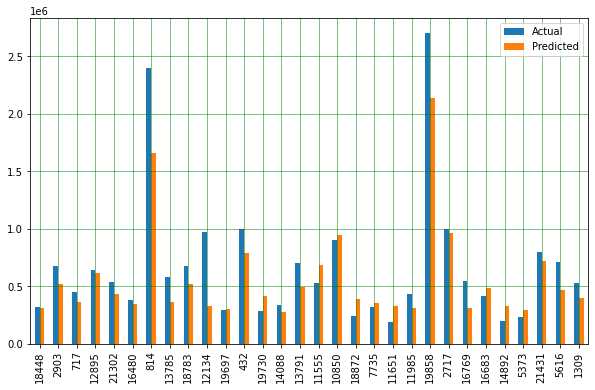

In [10]:
df_temp = df_temp.head(30)
df_temp.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [11]:
print('Mean Absolute Error:', metrics.mean_absolute_error(testY, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(testY, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(testY, y_pred)))

Mean Absolute Error: 145433.7214972366
Mean Squared Error: 49352396805.482414
Root Mean Squared Error: 222153.99344932428


O que essas métricas significam e como interpretá-las, descrevi no seguinte post: Métricas para Análise de Regressão

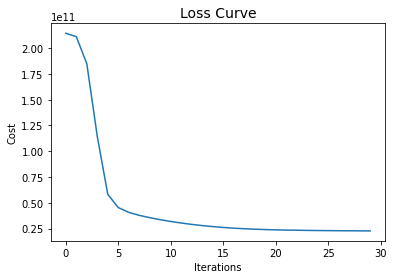

In [12]:
plt.plot(mlp_reg.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

# 6. Tuning dos Hyper Parameter

In [13]:
param_grid = {
    'hidden_layer_sizes': [(150,100,50), (120,80,40)],
    'max_iter': [30, 50, 100],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.0005, 0.005],
}

In [14]:
grid = GridSearchCV(mlp_reg, param_grid, n_jobs= 2, cv=5)
grid.fit(trainX_scaled, trainY)

print(grid.best_params_) 

/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iter

/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum ite

/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iter

/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iter

/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/home/rcls/codigos/git-projects/mineracao-dados/

/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/home/rcls/codigo

/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/base.py", line 706, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py", line 789, in r2_

/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/si

/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/home/rcls/codigos/git-projects/mineracao-dados/

/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/home/rcls/codigos/git-projects/mineracao-dados/

/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rcls/codigo

/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/neural_network/_multil

/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/neural_network/_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic 

/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/utils/extmath.py:153: Ru

/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rcls/codi

/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File 

/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/neural_network/_mul

/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rcls/codig

/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iter

/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/neural_network/_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a

/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/

/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/neural_network/_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and 

/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test part

/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/home/rcls/codigos/git-projects/mineracao-dados

{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (150, 100, 50), 'max_iter': 100, 'solver': 'adam'}


/home/rcls/codigos/git-projects/mineracao-dados/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [15]:
grid_predictions = grid.predict(testX_scaled) 

In [16]:
df_temp2 = pd.DataFrame({'Actual': testY, 'Predicted': grid_predictions})
df_temp2.head()

,Actual,Predicted
18448,325000.0,309924.133172
2903,675000.0,510356.385166
717,452000.0,409263.152958
12895,645000.0,600735.512612
21302,540000.0,422263.037803


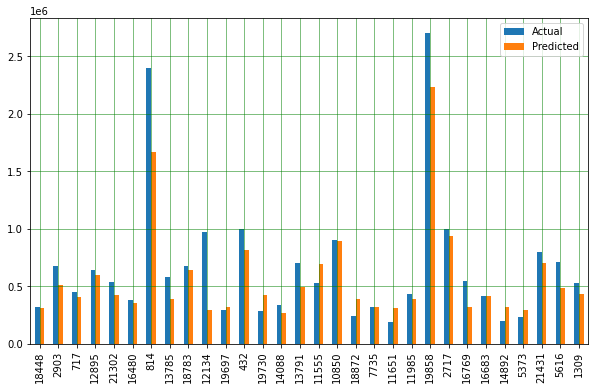

In [17]:
df_temp2 = df_temp2.head(30)
df_temp2.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [18]:
print('Mean Absolute Error:', metrics.mean_absolute_error(testY, grid_predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(testY, grid_predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(testY, grid_predictions)))


Mean Absolute Error: 138727.15584011577
Mean Squared Error: 45071417255.05839
Root Mean Squared Error: 212300.29970553124


Baseado no post https://michael-fuchs-python.netlify.app/2021/02/10/nn-multi-layer-perceptron-regressor-mlpregressor/